In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

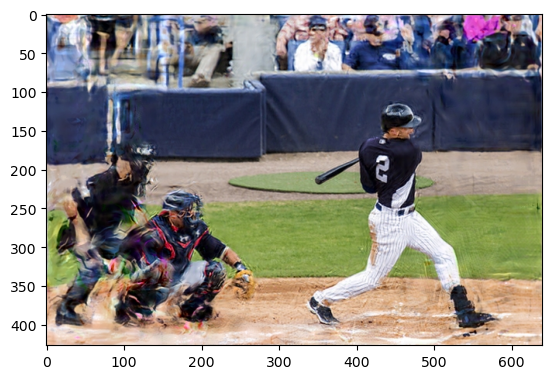

In [2]:
im_folder = './'
imnum ="000000281409.jpg"
im_path = f"{im_folder}final_experiment_pseudofoveated_no_ring/present/160/000000281409_0.png"

im = cv2.imread(im_path)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [3]:
def find_fixation_location(img, bbx_xywh, eccentricity, ppd, plot=False):

    #get desired distance
    fd  = eccentricity * ppd
    
    ##TODO: Possibly base this off of distance from bbx edge rather than center.
    object_loc_center = (bbx_xywh[0] + (bbx_xywh[2]//2), bbx_xywh[1] + (bbx_xywh[3]//2))
    #object_loc_edge = 
    object_loc = object_loc_center
    
    #get image center
    imshape = np.shape(img)
    img_center = (imshape[1]//2, imshape[0]//2)
    
    #get angle to center
    dy = object_loc[1] - img_center[1]
    dx = object_loc[0] - img_center[0]
    theta = np.arctan2(dy,dx)
    
    #solve for fixation location
    fix_dy = np.sin(theta)*fd
    fix_dx = np.cos(theta)*fd
    #add or subtract position from object center based on quadrant
    if(fix_dy > object_loc[1]):
        fix_y = object_loc[1] + fix_dy
    else:
        fix_y = object_loc[1] - fix_dy
    if(fix_dx > object_loc[0]):
        fix_x = object_loc[0] + fix_dx
    else:
        fix_x = object_loc[0] - fix_dx

    #print(img_center, object_loc)
    #print(dy,dx,theta)
    #pring(fix_x, fix_y)
    #plotting
    if(plot):
        rect = patches.Rectangle((bbx_xywh[0], bbx_xywh[1]), bbx_xywh[2], bbx_xywh[3], linewidth=1, edgecolor='r', facecolor='none')
        fig,ax = plt.subplots()
        ax.imshow(im)
        ax.add_patch(rect)
        ax.scatter(*object_loc,label='object')
        plt.scatter(*img_center,label='center')
        plt.scatter(fix_x,fix_y,label='fixation')
        plt.legend()
        plt.show()

    return((fix_x,fix_y))

In [4]:
import csv
bbx_info = {}
with open("../cocop_bbx_fixations_new.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for i,row in enumerate(csv_reader):
        if i != 0:
            bbx_info[row[0]] = row[1:]
        else:
            print(row)

['image_name', 'object_name', 'index', 'bbx_x_16', 'bbx_y_16', 'bbx_w_16', 'bbx_h_16', 'imsize_x_16', 'imsize_y_16', 'imsize_x_22', 'imsize_y_22', 'bbx_x_22', 'bbx_y_22', 'bbx_w_22', 'bbx_h_22', 'fx_x_16_5', 'fx_y_16_5', 'fx_x_22_5', 'fx_y_22_5', 'fx_x_16_10', 'fx_y_16_10', 'fx_x_22_10', 'fx_y_22_10', 'fx_x_16_15', 'fx_y_16_15', 'fx_x_22_15', 'fx_y_22_15', 'fx_x_16_20', 'fx_y_16_20', 'fx_x_22_20', 'fx_y_22_20']


In [5]:
bbx_xywh = (bbx_info[imnum][2], bbx_info[imnum][3], bbx_info[imnum][4], bbx_info[imnum][5])
bbx_xywh = [int(b) for b in bbx_xywh]

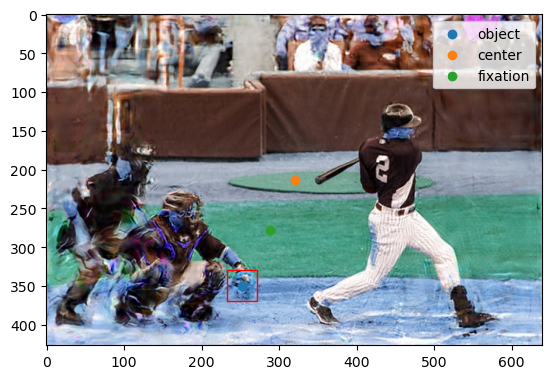

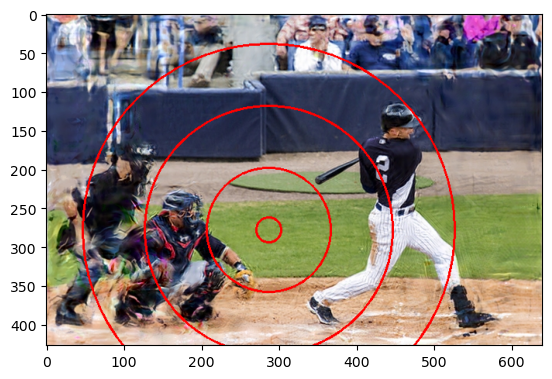

In [6]:
# bbx_xywh = (427,228,24,49)
fx,fy = find_fixation_location(im,bbx_xywh, 5, 16,plot=True)
for d in [1,5,10,15]:
    im_new = cv2.circle(im,(int(fx),int(fy)),d*16,(0, 0, 255),2)

plt.imshow(cv2.cvtColor(im_new, cv2.COLOR_BGR2RGB))
# find_fixation_location(im,bbx_xywh, 10, 16,plot=True)
# find_fixation_location(im,bbx_xywh, 15, 16,plot=True)
# find_fixation_location(im,bbx_xywh, 20, 16,plot=True)

In [87]:
cv2.imwrite("/home/gridsan/groups/RosenholtzLab/detection_repos/pseudofoveated_fig_5_fix.png",im_new)

True